# <center>$x$-$z$ plots of the XNSmod code</center>

In this notebook we plot the main outputs of the XNSmod code in an $x$-$z$ plane.

### Import files and define variables

In [1]:
import os
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

cwd = os.path.join(os.getcwd(),'stt','b-6_polo_pol2')
hydropath = os.path.join(cwd,'Hydroeq.dat')
hydromagpath = os.path.join(cwd,'Hydroeq_mag.dat')
surfpath = os.path.join(cwd,'Surf.dat')

rhounit=6.2031e17 
bunit=8.3758e19
runit=1.47459

# =============================================================================
# DICTIONARIES
# =============================================================================
#Colorbar orientation
orientation = {'v': 'vertical', 'h': 'horizontal'}

# =============================================================================
# SETTING
# =============================================================================
#Figure size
xsize=12
ysize=12

#xlim and ylim
Xmin=-20
Xmax=20
Ymin=-20
Ymax=20

#Label x-axis (or both axes if contour plot)
XAxisStr = 'x-axis'
YAxisStr = 'z-axis'

#Font size
FontSizeAxis = 10
FontSizeTitle = 10
lbs=25
fs=lbs

#"Tick frequency" on x and y axis
tfx = 5 #x-axis
tfy = 5 #y-axis

#Plot variable
PLOT = True

#Contour lines color and linestyles in contour plot
rgb_r = 16 #rgb red
rgb_g = 52 #rgb green
rgb_b = 166 #rgb blue
COLORS = (rgb_r/255,rgb_g/255,rgb_b/255)
LINESTYLES = 'solid'

#Color map and transparency in contour plot
CMAP = 'jet'
ALPHA = 1.0 #(0<= alpha <= 1)
fr=0.043
pd=-0.1

#Settings for streamplot
rgb_r_sp = 16 #rgb red
rgb_g_sp = 52 #rgb green
rgb_b_sp = 166 #rgb blue
COLOR_SP = (rgb_r_sp/255,rgb_g_sp/255,rgb_b_sp/255)
ARROWSIZE = 1.5
LINEWIDTH = 1.
DENSITY = 150

### Grid, Main and Read functions

Maximum values: 
Bmax:  4.75e+17 G
CHImax:  0.00e+2
RHOmax:  5.15e+14 g/cm^3



B, Chi or Rho?[b,c,r]  r


C:\Users\solda\AppData\Local\Temp/ipykernel_25080/1353612975.py:151: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt1=plt.pcolor(XC*runit,YC*runit,RHO,cmap=CMAP,alpha=ALPHA,vmin=RHO.min(),vmax=RHO.max())
C:\Users\solda\AppData\Local\Temp/ipykernel_25080/1353612975.py:152: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(-XC*runit,YC*runit,RHO,cmap=CMAP,alpha=ALPHA,vmin=RHO.min(),vmax=RHO.max())
C:\Users\solda\anaconda3\lib\site-packages\scipy\inter

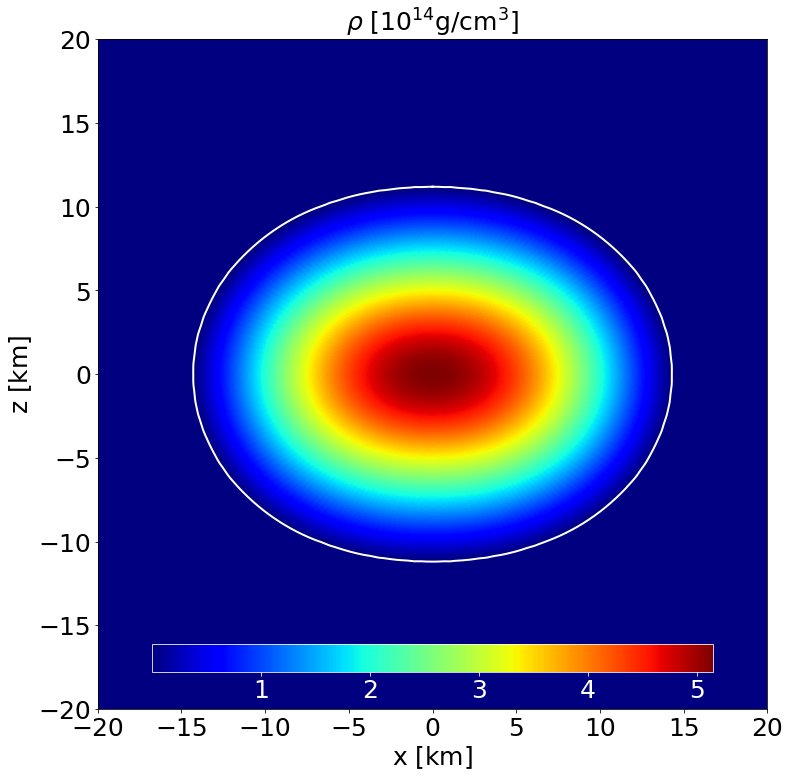

In [4]:
# =============================================================================
# GRID FUNCTION
# =============================================================================
def grid():
    f = np.fromfile(os.path.join(cwd,'Grid.dat'),count=7,sep=' ')
    
    NTH = int(f[0])
    NR = int(f[1])

    data = np.genfromtxt(os.path.join(cwd,'Grid.dat'), skip_header=1, usecols=0, unpack=True)
    
    TH = data[0:NTH]
    R = data[NTH:NTH+NR]
    Rmin = R.min()
    Rmax=R.max()
    radius = np.linspace(Rmin,Rmax,NR)
    theta = np.linspace(0,np.pi,NTH)
    
    r2,th2 = np.meshgrid(radius,theta)
    XC = np.outer(np.sin(theta),R)
    YC = np.outer(np.cos(theta),R)
    return NTH,NR,R,TH,XC,YC,Rmin,Rmax

# =============================================================================
# MAIN FUNCTION
# type_plot can be 1 (linear plot) or 2 (contour plot)
# =============================================================================
def main():
    #Grid
    NTH,NR,R,TH,XC,YC,Rmin,Rmax = grid()

    #Magnetic and Scalar Fields
    B,BPOL,CHI,SURF,RHO,PSI,ALP = read(NTH,NR,R,TH)
    
    
    #Figure size
#     fig=plt.figure(figsize=(xsize,ysize))
    fig, ax = plt.subplots(1,1,figsize=(xsize,ysize))
    plt.ylabel('z $[$km$]$', fontsize=lbs)
    plt.xlabel('x $[$km$]$', fontsize=lbs)
#         mplcursors.cursor()
    ax = fig.gca()
    ax.set_aspect('equal')

    
    print('Maximum values: ')
    print('Bmax: ', '{:.2e}'.format(Decimal(B.max()*bunit)),'G')
    print('CHImax: ', '{:.2e}'.format(Decimal(CHI.max())))
    print('RHOmax: ', '{:.2e}'.format(Decimal(RHO.max()*rhounit)),'g/cm^3')
    
    #Magnetic Field Lines
    while True:
        print('')
        BorChi = input('B, Chi or Rho?[b,c,r] ') or 'b'
        
        if BorChi == 'b':
            
            MagLines = input('Field lines?[y,n] ') or 'y'
            filename='starplot_b_b-6_polo.png'
            
            if MagLines == 'y':
                FieldLines(NTH,NR,R,TH,Rmin,Rmax)
                #Colored map of B  
                BFIELD=B*bunit/1.0e17
                plt1=plt.pcolor(XC*runit,YC*runit,BFIELD,cmap=CMAP,alpha=ALPHA,vmin=BFIELD.min(),vmax=BFIELD.max())
                plt.pcolor(-XC*runit,YC*runit,BFIELD,cmap=CMAP,alpha=ALPHA,vmin=BFIELD.min(),vmax=BFIELD.max()) 
                plt.title('B $[10^{17}$G$]$',color='black',size=fs,pad=8)                
                clb = plt.colorbar(plt1,fraction=fr,pad=pd,orientation="horizontal")
                clb.ax.tick_params(labelsize=lbs,colors='white') 
#                 clb.ax.set_title('B $[10^{17}$G$]$',color='white',size=fs,y=-1.9,bbox=dict(facecolor='blue', alpha=1.0))
                clb.outline.set_edgecolor('white')
                clb.solids.set_rasterized(True) 
                
                theta = np.linspace(0,np.pi,NTH)
                XC =np.zeros(2*NTH-1)
                YC =np.zeros(2*NTH-1)
                XC[0:NTH-1] = np.sin(theta[0:NTH-1])*SURF[0:NTH-1]*runit
                YC[0:NTH-1] = np.cos(theta[0:NTH-1])*SURF[0:NTH-1]*runit
                XC[NTH-1:2*NTH-2] = -np.sin(theta[0:NTH-1])*SURF[0:NTH-1]*runit
                YC[NTH-1:2*NTH-2] = -np.cos(theta[0:NTH-1])*SURF[0:NTH-1]*runit
                pts=(np.zeros((len(XC),2)))
                pts[:,0]=XC
                pts[:,1]=YC
                tck, u = splprep(pts.T, u=None, s=0.0, per=1) 
                u_new = np.linspace(u.min(), u.max(), 1000)
                x_new, y_new = splev(u_new, tck, der=0)
                plt.plot(x_new, y_new, 'b-',color='white',linewidth=2)
                
                break
            elif MagLines == 'n':
                #Colored map of B        
                BFIELD=B*bunit/1.0e17
                plt1=plt.pcolor(XC*runit,YC*runit,BFIELD,cmap=CMAP,alpha=ALPHA,vmin=BFIELD.min(),vmax=BFIELD.max())
                plt.pcolor(-XC*runit,YC*runit,BFIELD,cmap=CMAP,alpha=ALPHA,vmin=BFIELD.min(),vmax=BFIELD.max()) 
                plt.title('B $[10^{17}$G$]$',color='black',size=fs,pad=8)                
                clb = plt.colorbar(plt1,fraction=fr,pad=pd,orientation="horizontal")
                clb.ax.tick_params(labelsize=lbs,colors='white') 
#                 clb.ax.set_title('B $[10^{17}$G$]$',color='white',size=fs,y=1.01)
                clb.outline.set_edgecolor('white')
                clb.solids.set_rasterized(True) 
                
                theta = np.linspace(0,np.pi,NTH)
                XC =np.zeros(2*NTH-1)
                YC =np.zeros(2*NTH-1)
                XC[0:NTH-1] = np.sin(theta[0:NTH-1])*SURF[0:NTH-1]*runit
                YC[0:NTH-1] = np.cos(theta[0:NTH-1])*SURF[0:NTH-1]*runit
                XC[NTH-1:2*NTH-2] = -np.sin(theta[0:NTH-1])*SURF[0:NTH-1]*runit
                YC[NTH-1:2*NTH-2] = -np.cos(theta[0:NTH-1])*SURF[0:NTH-1]*runit
                pts=(np.zeros((len(XC),2)))
                pts[:,0]=XC
                pts[:,1]=YC
                tck, u = splprep(pts.T, u=None, s=0.0, per=1) 
                u_new = np.linspace(u.min(), u.max(), 1000)
                x_new, y_new = splev(u_new, tck, der=0)
                plt.plot(x_new, y_new, 'b-',color='white',linewidth=1)
                break
            else:
                print('You must enter only "y" or "n"')
        elif BorChi == 'c':
            filename='starplot_chi_b-6_polo.png'
            #Colored map of CHI
            CHIFIELD=CHI*10
            plt1=plt.pcolor(XC*runit,YC*runit,CHIFIELD,cmap=CMAP,alpha=ALPHA,vmin=CHIFIELD.min(),vmax=CHIFIELD.max())
            plt.pcolor(-XC*runit,YC*runit,CHIFIELD,cmap=CMAP,alpha=ALPHA,vmin=CHIFIELD.min(),vmax=CHIFIELD.max())
            plt.title('$\\chi$ ',color='black',size=fs,pad=8)
            clb = plt.colorbar(plt1,fraction=fr,pad=pd,orientation="horizontal")
            clb.ax.tick_params(labelsize=lbs,colors='black') 
            clb.outline.set_edgecolor('black')
            clb.solids.set_rasterized(True) 
            
            theta = np.linspace(0,np.pi,NTH)
            XC =np.zeros(2*NTH-1)
            YC =np.zeros(2*NTH-1)
            XC[0:NTH-1] = np.sin(theta[0:NTH-1])*SURF[0:NTH-1]*runit
            YC[0:NTH-1] = np.cos(theta[0:NTH-1])*SURF[0:NTH-1]*runit
            XC[NTH-1:2*NTH-2] = -np.sin(theta[0:NTH-1])*SURF[0:NTH-1]*runit
            YC[NTH-1:2*NTH-2] = -np.cos(theta[0:NTH-1])*SURF[0:NTH-1]*runit
            pts=(np.zeros((len(XC),2)))
            pts[:,0]=XC
            pts[:,1]=YC
            tck, u = splprep(pts.T, u=None, s=0.0, per=1) 
            u_new = np.linspace(u.min(), u.max(), 1000)
            x_new, y_new = splev(u_new, tck, der=0)
            plt.plot(x_new, y_new, 'b-',color='white',linewidth=2)    
            break
        elif BorChi == 'r':
            filename='starplot_rho_b-6_polo.png'
            #Colored map of RHO
#             RHO=np.log10(RHO+1.E-10)
            RHO=RHO*rhounit/1.0e14
            plt1=plt.pcolor(XC*runit,YC*runit,RHO,cmap=CMAP,alpha=ALPHA,vmin=RHO.min(),vmax=RHO.max())
            plt.pcolor(-XC*runit,YC*runit,RHO,cmap=CMAP,alpha=ALPHA,vmin=RHO.min(),vmax=RHO.max())
            plt.title('$\\rho$ $[10^{14}$g/cm$^3$$]$',color='black',size=fs,pad=8)
            clb = plt.colorbar(plt1,fraction=fr,pad=pd,orientation="horizontal")
            clb.ax.tick_params(labelsize=lbs,colors='white')           
            clb.outline.set_edgecolor('white')
            clb.solids.set_rasterized(True)         
            
            theta = np.linspace(0,np.pi,NTH)
            XC =np.zeros(2*NTH-1)
            YC =np.zeros(2*NTH-1)
            XC[0:NTH-1] = np.sin(theta[0:NTH-1])*SURF[0:NTH-1]*runit
            YC[0:NTH-1] = np.cos(theta[0:NTH-1])*SURF[0:NTH-1]*runit
            XC[NTH-1:2*NTH-2] = -np.sin(theta[0:NTH-1])*SURF[0:NTH-1]*runit
            YC[NTH-1:2*NTH-2] = -np.cos(theta[0:NTH-1])*SURF[0:NTH-1]*runit
            pts=(np.zeros((len(XC),2)))
            pts[:,0]=XC
            pts[:,1]=YC
            tck, u = splprep(pts.T, u=None, s=0.0, per=1) 
            u_new = np.linspace(u.min(), u.max(), 1000)
            x_new, y_new = splev(u_new, tck, der=0)
            plt.plot(x_new, y_new, 'b-',color='white',linewidth=2)
            break
        else:
            print('You can enter only "b", "c" or "r"')

    #Axes limits
    plt.xlim(Xmin,Xmax)
    plt.ylim(Ymin,Ymax)
    
    #"Tick frequency" on x and y axis
    plt.xticks(np.arange(Xmin, (Xmax+1), tfx))
    plt.yticks(np.arange(Ymin, (Ymax+1), tfx))
    plt.tick_params(labelsize=lbs)


            
    #Showing
    if (PLOT):
        plt.gca().set_aspect('equal', adjustable='box')
        fig.savefig(os.path.join(cwd,filename), format='png', dpi=70, bbox_inches='tight')
        plt.show()
        
        

# =============================================================================
# READ FUNCTION
# =============================================================================
def read(NTH,NR,R,TH,LINES=False):
    # psi function
    psi = np.genfromtxt(hydropath, skip_header=1, usecols=2, unpack=True).reshape(NTH,NR)
    # alpha
    alpha = np.genfromtxt(hydropath, skip_header=1, usecols=4, unpack=True).reshape(NTH,NR)
    # chi function
    chi = np.genfromtxt(hydropath, skip_header=1, usecols=6, unpack=True).reshape(NTH,NR)
    ascal2=np.exp(-2.0E-4*chi*2-6*chi**2)
    # stellar surface
    surf = np.genfromtxt(surfpath, usecols=0, unpack=True)
    # density rho
    rho = np.genfromtxt(hydropath, skip_header=1, usecols=0, unpack=True).reshape(NTH,NR)

    B2 = np.zeros((NTH,NR))
    B2POL = np.zeros((NTH,NR))

    #Magnetic Field (Hydroeq_mag file)
    dataMag = np.genfromtxt(hydromagpath, skip_header=1, usecols=(0,1,2), unpack=True)
    b3 = dataMag[0].reshape(NTH,NR)
    bpolr = dataMag[1].reshape(NTH,NR)
    bpolt = dataMag[2].reshape(NTH,NR)
    

    for i in range(0,NTH):
        for k in range(0,NR):
            GCOVR,GCOVT,GCOVP = covterm(psi[i,k],R[k],TH[i],ascal2[i,k])
            B2POL[i,k] = np.square(bpolr[i,k])*GCOVR + np.square(bpolt[i,k])*GCOVT
            B2TOR = np.square(b3[i,k])*GCOVP
            B2[i,k] = B2POL[i,k] + B2TOR
        
    B = np.sqrt(B2)#/4.244674e-20 #Gauss unit
    BPOL = np.sqrt(B2POL)#/4.244674e-20
    
    if LINES == False:
        return B,BPOL,chi,surf,rho,psi,alpha
    elif LINES == True:
        return bpolr,bpolt,psi,B,chi,surf,rho

def FieldLines(NTH,NR,R,TH,Rmin,Rmax):   
    bpolr,bpolt,psi,B,chi,surf,rho = read(NTH,NR,R,TH,LINES=True)

    Rint=int(Rmax/2)
    brr = np.zeros((Rint,Rint))
    btt = np.zeros((Rint,Rint))
    
    x = np.linspace(-Rint/np.sqrt(2),Rint/np.sqrt(2),Rint)
    z = np.linspace(-Rint/np.sqrt(2),Rint/np.sqrt(2),Rint)
    
    for i in range(0,Rint):
        for k in range(0,Rint):
            xpt = x[i]
            zpt = z[k]
            rpt = np.sqrt(xpt**2+zpt**2)
            thpt = np.arccos(zpt/(rpt+1.e-12))
            rint = np.interp(rpt,R,np.linspace(1,NR,NR))
            rint = rint.astype(int)
            thint = (thpt/np.pi*NTH).astype(int)
            alphas = np.exp(-0.0002*chi[thint,rint]-6/2.*chi[thint,rint]**2)
            brloc = bpolr[thint,rint]
            bthloc = bpolt[thint,rint]
            psiloc = psi[thint,rint]                    
            bxx = np.sign(xpt)*(brloc*np.sin(thpt) + bthloc*rpt*np.cos(thpt))
            bzz = brloc*np.cos(thpt) - bthloc*rpt*np.sin(thpt)
            brr[k,i] = bxx*psiloc**2*alphas
            btt[k,i] = bzz*psiloc**2*alphas
            
    
# =============================================================================
#     BPOL = B2POL
#     bx = (BPOL.T*np.sin(TH)).T
#     by = (BPOL.T*np.cos(TH)).T
# =============================================================================
    en = np.sqrt(brr**2 + btt**2)
    lw=2*en / en.max()+.5

    xstart = np.linspace(0.5,10,15)
    ystart = np.linspace(-0,0,15)
    startp=np.vstack([xstart,ystart]).T
    
    strm = plt.streamplot(x*runit,z*runit,brr*bunit,btt*bunit,color='white',linewidth=0.5,arrowsize=0,density=30,start_points=startp)
    
    xstart = np.linspace(-10,-0.5,15)
    ystart = np.linspace(-0,0,15)
    startp=np.vstack([xstart,ystart]).T
    
    strm = plt.streamplot(x*runit,z*runit,brr*bunit,btt*bunit,color='white',linewidth=0.5,arrowsize=0,density=30,start_points=startp)


# =============================================================================
# COVTERM FUNCTION
# =============================================================================
def covterm(psi,R,TH,ascal2):
    GCOVR = psi**4*ascal2
    GCOVT = psi**4*np.square(R)*ascal2
    GCOVP = psi**4*np.square(R)*np.square(np.sin(TH))*ascal2
    return GCOVR,GCOVT,GCOVP

# =============================================================================
# RUN FILE AS MAIN
# =============================================================================
if __name__ == "__main__":
    main()